# Анализ оттока клиентов

## Задача**:**

Проанализируйте клиентов регионального банка и выделите портрет клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных*

## Материалы

* [Презентация](https://disk.yandex.lt/i/dsouFlUz9TEpYA)

In [79]:
df.groupby('products').agg({'user_id':'nunique'})

,user_id
products,
0,1
1,3326
2,5106
3,1046
4,474
5,30


## Загрузка и предобработка данных

In [1]:
!pip install phik

     |████████████████████████████████| 709 kB 2.6 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#import math as mt
from scipy import stats as st
from matplotlib import pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [3]:
# чтение файла с данными и сохранение его в переменную
path = "https://drive.google.com/uc?export=download&id=1Q9_gSHSfe-AqwI3mLANe46jeS_CQMl8F"
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [5]:
df.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace=True)

In [6]:
df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,106217,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,113370,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [7]:
df.duplicated().sum()

1

In [8]:
df.query('user_id == 141945')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4343,141945,929.0,Ярославль,М,33,0,NaN,1,1,0,381868.89,0
9457,141945,929.0,Ярославль,М,33,0,NaN,1,1,0,381868.89,0


In [9]:
df.duplicated(subset=['user_id']).sum()

17

In [10]:
df[df.duplicated(subset=['user_id'])].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9457,141945,929.0,Ярославль,М,33,0,NaN,1,1,0,381868.89,0
9632,185829,927.0,Ярославль,М,40,0,NaN,1,1,0,231254.86,0
9380,187459,894.0,Рыбинск,М,48,0,NaN,1,1,0,178012.28,0
2165,187635,692.0,Ярославль,Ж,44,0,NaN,1,1,1,160368.82,0
8015,198635,670.0,Ярославль,Ж,32,0,NaN,1,1,1,168699.33,0
9301,202983,942.0,Ростов,Ж,39,0,NaN,1,1,1,163804.73,0
8385,206759,915.0,Ярославль,М,22,0,NaN,1,1,0,71179.53,0
8449,210898,705.0,Ярославль,Ж,35,0,NaN,1,0,1,922080.25,0
8293,216848,930.0,Ярославль,М,34,0,NaN,1,1,1,199542.51,0
5470,218868,827.0,Ярославль,Ж,38,4,448959.07,2,1,1,67835.95,0


In [11]:
df.drop_duplicates(subset=['user_id'], inplace=True)
df.reset_index(drop=True)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,106217,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,113370,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9978,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9979,139170,894.0,Ярославль,М,46,0,NaN,1,1,0,196898.29,0
9980,115639,903.0,Ярославль,М,24,0,NaN,2,1,1,108905.09,0
9981,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


In [12]:
df.duplicated(subset=['user_id']).sum()

0

In [13]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2281
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [14]:
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20,2,0.0,2,1,0,23876.51,0


In [15]:
df[df['balance'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2281.000000,2281.000000,2281.000000,2281.000000,0.0,2281.000000,2281.000000,2281.000000,2.281000e+03,2281.000000
mean,171855.666813,864.049101,41.875055,0.051293,NaN,1.163086,0.815432,0.549320,2.262586e+05,0.005699
std,33334.245974,90.898200,11.746134,0.226529,NaN,0.403565,0.388032,0.497671,1.997597e+05,0.075294
min,100276.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142959.000000,870.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.201742e+05,0.000000
50%,172202.000000,902.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.742449e+05,0.000000
75%,201254.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403244e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


In [16]:
df[~df['balance'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7702.000000,7702.000000,7702.000000,7702.000000,7.702000e+03,7702.000000,7702.000000,7702.000000,7.702000e+03,7702.000000
mean,159671.033757,843.750844,43.133861,3.394962,8.279126e+05,2.086341,0.639964,0.515710,1.245210e+05,0.234874
std,40039.341760,55.337199,12.229523,1.584585,1.980987e+06,0.765744,0.480042,0.499786,1.046787e+05,0.423948
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,123027.250000,801.000000,34.000000,2.000000,2.954714e+05,2.000000,0.000000,0.000000,6.755439e+04,0.000000
50%,158965.500000,840.000000,40.000000,4.000000,5.242838e+05,2.000000,1.000000,1.000000,1.062342e+05,0.000000
75%,194231.750000,882.000000,52.000000,5.000000,9.808493e+05,2.000000,1.000000,1.000000,1.550932e+05,0.000000
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [17]:
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20,2,0.0,2,1,0,23876.51,0


In [18]:
df[df['balance'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38,0,NaN,1,1,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46,0,NaN,1,1,0,196898.29,0


<AxesSubplot:>

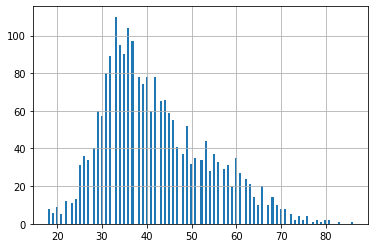

In [19]:
df[df['balance'].isna()]['age'].hist(bins = 150)

In [1]:
df['balance'].fillna(0, inplace=True)

NameError: name 'df' is not defined

Есть много пропусков в балансе, будем считать что пропущенные значений это нулевой баланс.
При этом, есть две строки где баланс = 0.

## EDA

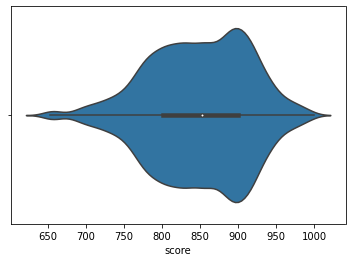

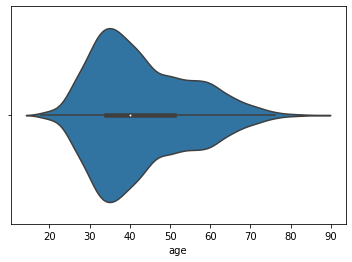

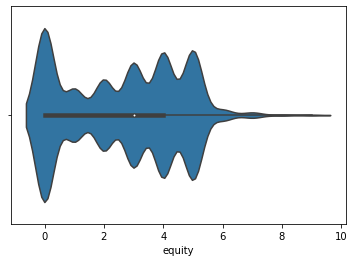

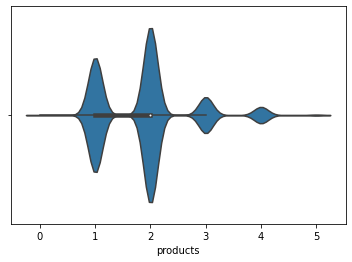

In [21]:
for column in ['score', 'age', 'equity', 'products']:
    sns.violinplot(data=df, x=column)
    plt.show()

Средний клиент банка имеет кредитный рейтинг между 800 и 900, возраст от 35 до 50 лет, со средним баллом equity ~ 2,5 и пользующийся 1-2 продуктами.

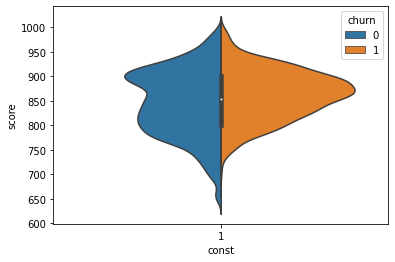

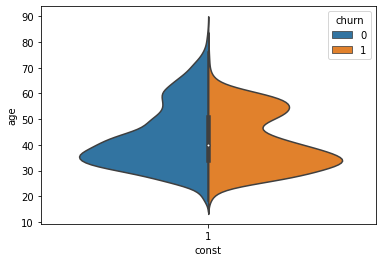

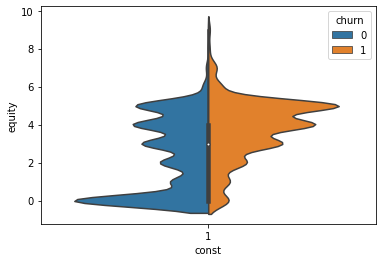

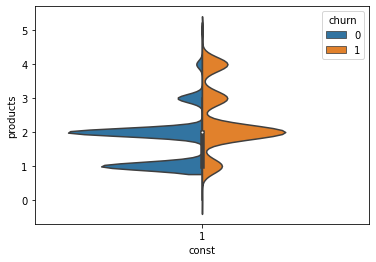

In [22]:

for column in ['score', 'age', 'equity', 'products']:
    sns.violinplot(data=df.assign(const=1), x='const', y=column, hue="churn", split=True)
    plt.show()

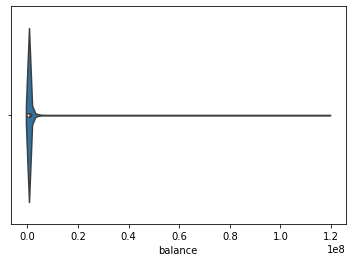

count    9.983000e+03
mean     6.387441e+05
std      1.774374e+06
min      0.000000e+00
25%      6.283197e+04
50%      3.761951e+05
75%      8.045188e+05
max      1.191136e+08
Name: balance, dtype: float64

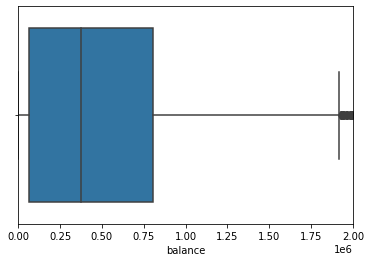

In [23]:
sns.violinplot(data= df, x = 'balance')
plt.show()
sns.boxplot(data= df, x = 'balance')
plt.xlim(0, 2000000)
df['balance'].describe()

[(0.0, 6000000.0)]

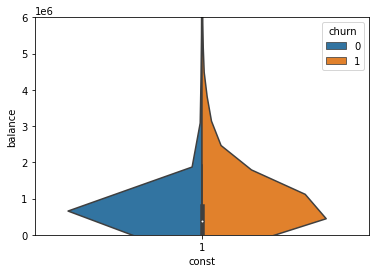

In [24]:
g = sns.violinplot(data=df.assign(const=1), x='const', y='balance', hue="churn", split=True)
g.set(ylim=(0, 6000000))

Text(0.5, 1.0, 'Распределение количества ушедших и оставшихся клиентов по количеству продуктов')

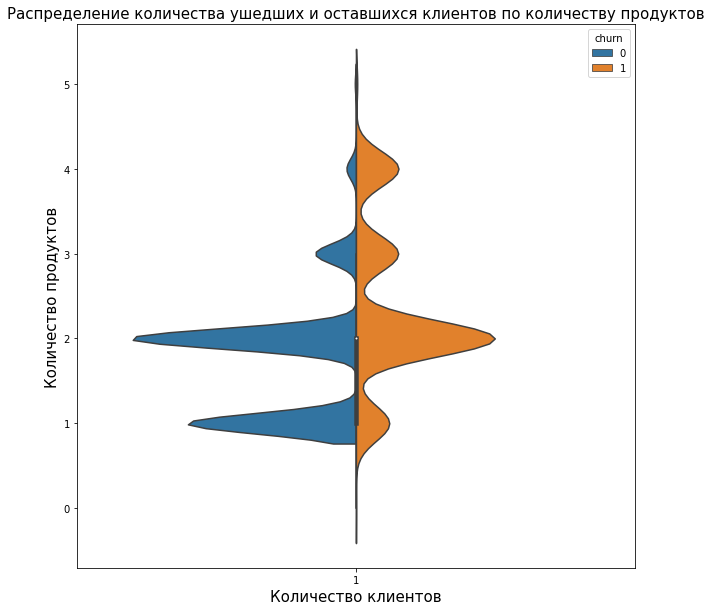

In [25]:
plt.figure(figsize=(10,10))
g = sns.violinplot(data=df.assign(const=1), x='const', y='products', hue="churn", split=True)
plt.xlabel('Количество клиентов', size=15)
plt.ylabel('Количество продуктов', size=15)
plt.title('Распределение количества ушедших и оставшихся клиентов по количеству продуктов', size = 15)

25 перцентиль ~ 60 тысяч, 75й ~ 800 тысяч. Есть и выбросы - есть счет с балансом ~120 миллионов рублей.

In [26]:
df.query('churn == 0').describe().round(1)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,8161.0,8161.0,8161.0,8161.0,8161.0,8161.0,8161.0,8161.0,8161.0,8161.0
mean,170024.8,845.0,43.2,2.4,530139.4,1.8,0.7,0.5,147670.2,0.0
std,34778.8,68.4,12.4,2.0,1693809.9,0.7,0.5,0.5,142668.4,0.0
min,94577.0,642.0,18.0,0.0,0.0,1.0,0.0,0.0,2546.3,0.0
25%,140239.0,795.0,34.0,0.0,0.0,1.0,0.0,0.0,73489.7,0.0
50%,171597.0,848.0,40.0,3.0,321597.8,2.0,1.0,0.0,118221.7,0.0
75%,200399.0,900.0,51.0,4.0,665417.0,2.0,1.0,1.0,173942.8,0.0
max,229145.0,1000.0,86.0,9.0,119113552.0,5.0,1.0,1.0,1395064.4,0.0


In [27]:
df.query('churn == 1').describe().round(1)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,1822.0,1822.0,1822.0,1822.0,1822.0,1822.0,1822.0,1822.0,1822.0,1822.0
mean,128549.1,863.4,41.4,3.8,1125200.6,2.4,0.5,0.7,148200.0,1.0
std,38565.1,49.6,11.0,1.6,2027943.3,0.9,0.5,0.5,122864.8,0.0
min,94561.0,706.0,18.0,0.0,0.0,0.0,0.0,0.0,10880.3,1.0
25%,101987.2,828.0,33.0,3.0,381308.7,2.0,0.0,0.0,83094.9,1.0
50%,110162.5,866.0,39.0,4.0,775301.5,2.0,1.0,1.0,125390.6,1.0
75%,147440.8,898.0,51.0,5.0,1346889.9,3.0,1.0,1.0,175878.0,1.0
max,228900.0,1000.0,79.0,9.0,64866210.2,5.0,1.0,1.0,1263028.5,1.0


У ушедших пользователей больше equity и больше средний баланс счета. Распределение по полу и возрасту примерно одинаковое среди оставшихся и ушедших клиентов. Распределение по городам тоже одинаковое.

<AxesSubplot:xlabel='score'>

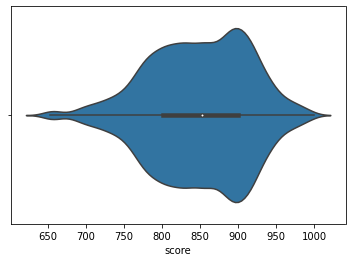

In [28]:
sns.violinplot(data=df, x='score', hue='churn', jitter=True)

<AxesSubplot:xlabel='last_activity', ylabel='Count'>

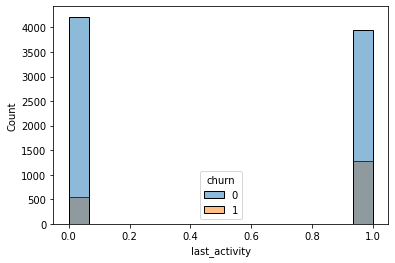

In [29]:

sns.histplot(data=df, hue='churn', x='last_activity', common_norm=True, cbar=True)

<AxesSubplot:xlabel='products', ylabel='Count'>

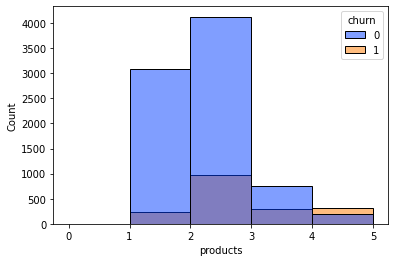

In [30]:
sns.histplot(data=df, hue='churn', x='products', palette='bright', binwidth=1)

In [31]:
df.pivot_table(index='city', values='churn').sort_values(by='churn', ascending=False)

,churn
city,
Ярославль,0.190226
Ростов,0.188112
Рыбинск,0.162406


In [32]:
df.pivot_table(index='gender', values='churn')

,churn
gender,
Ж,0.127984
М,0.236895


In [2]:
df_port = df.groupby('churn').agg(['mean','median']).T
df_port['%'] = df_port[1] / df_port[0] - 1
df_port.sort_values('%').style.format('{:_.2f}')

NameError: name 'df' is not defined

Text(0.5, 1.0, 'Матрица корреляции признаков(Пирсона)')

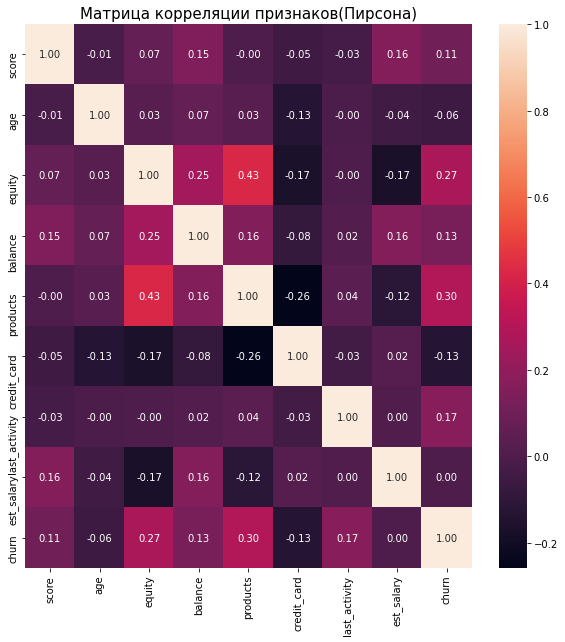

In [34]:
plt.figure(figsize=(10,10))
sns.color_palette("vlag", as_cmap=True)
sns.heatmap(data = df.drop(columns='user_id').corr(), annot = True, fmt = '.2f', cbar=True)
plt.title(label='Матрица корреляции признаков(Пирсона)', size=15)

High correlation - churn/equity, churn/products, churn/last_activity

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


<AxesSubplot:>

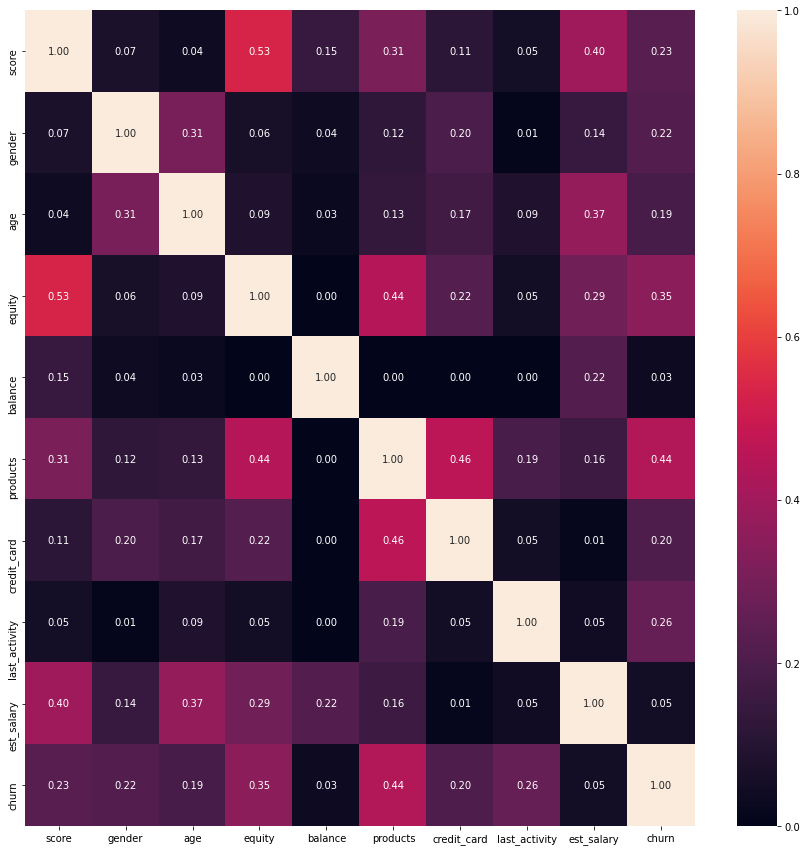

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.drop(columns=['user_id', 'city']).phik_matrix(), annot = True, fmt = '.2f', cbar=True)

Наибольшая корреляция есть между количеством продуктов и churn. Исключим products = 0 и построим матрицу еще раз.

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


<AxesSubplot:>

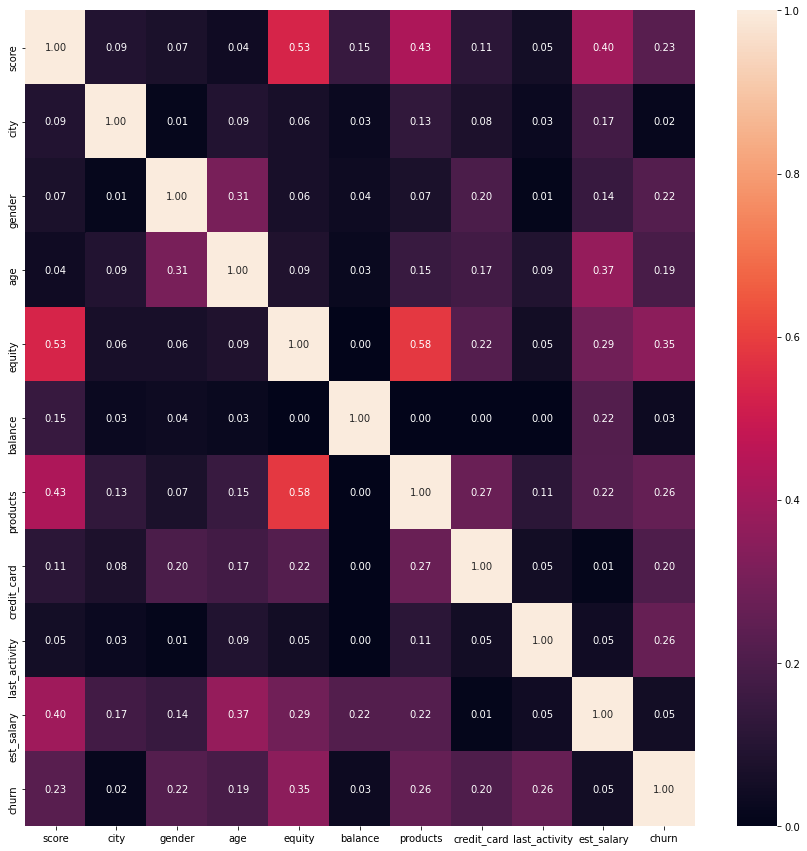

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.drop(columns='user_id').query('products !=0').phik_matrix(), annot = True, fmt = '.2f', cbar=True)

Большая корреляция с equity, все остальные метрики скоррелированы примерно одинаково, баланс счета и предполагаемая зарплата имеют околонулевую корреляцию с оттоком. Phik не отображает позитивную/негативную корреляцию, но судя по корреляции Пирсона, поля score, equity, products, last_activity имеют положительную корреляцию с оттоком.

Метрики age и credit_card скореллированые по разному, в зависимости от метода корреляции.

In [37]:
df['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

Text(0.5, 1.0, 'Зависимость оттока от имущества клиента')

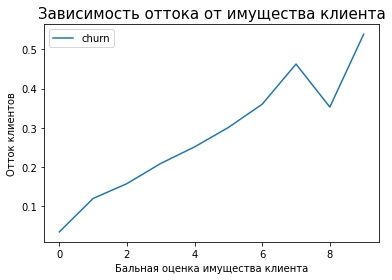

In [38]:
equity_churn = df.groupby('equity').agg({'churn':'mean'})
equity_churn.plot()
plt.xlabel('Бальная оценка имущества клиента', size = 10)
plt.ylabel('Отток клиентов', size = 10)
plt.title('Зависимость оттока от имущества клиента', size = 15)

Чем больше equity у человека, тем выше шанс что он уйдет из банка...

In [39]:
products_churn = df.groupby('products').agg({'churn':'mean'})
products_churn

,churn
products,
0,1.000000
1,0.070655
2,0.191735
3,0.284895
4,0.632911
5,0.300000


Text(0.5, 1.0, 'Зависимость оттока от количества продуктов клиента')

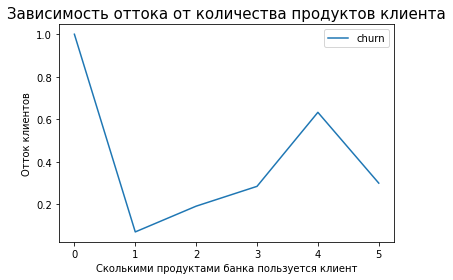

In [40]:
products_churn.plot()
plt.xlabel('Сколькими продуктами банка пользуется клиент', size = 10)
plt.ylabel('Отток клиентов', size = 10)
plt.title('Зависимость оттока от количества продуктов клиента', size = 15)

Если у человека осталось 0 продуктов банка - он ушел, поэтому churn - 1. При этом, с ростом количества продуктов, растет и churn rate. При этом у клиентов с 5ю продуктами, churn rate в два раза меньше чем у клиентов с 4мя. Гипотеза - если у человека максимум продуктов, у него уже есть loyalty к банку.

<AxesSubplot:xlabel='last_activity'>

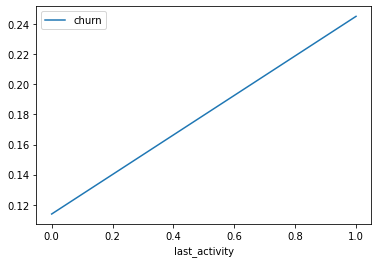

In [41]:
last_activity_churn = df.groupby('last_activity').agg({'churn':'mean'})
last_activity_churn.plot()

In [42]:
df.groupby('churn')['last_activity'].agg(['count','mean'])

,count,mean
churn,,
0,8161,0.483397
1,1822,0.702525


Среди ушедших клиентов активность выше.

<AxesSubplot:xlabel='score'>

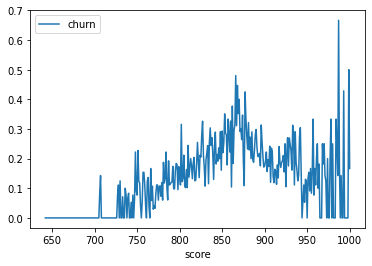

In [43]:
score_activity_churn = df.groupby('score').agg({'churn':'mean'})
score_activity_churn.plot()

<AxesSubplot:xlabel='score', ylabel='Density'>

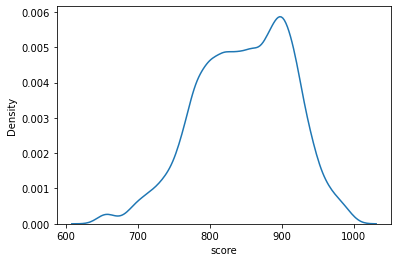

In [45]:
sns.kdeplot(data=df.score.round(-1))

## Сегментация

<AxesSubplot:xlabel='products'>

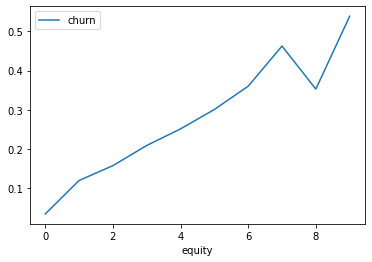

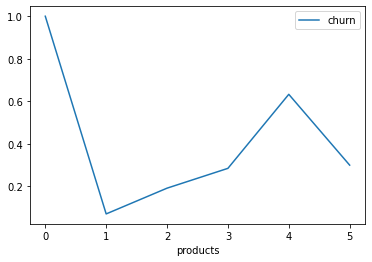

In [47]:
equity_churn.plot()
products_churn.plot()

Проведем сегментацию так - 1 группа - с equity от 1 до 6, 2 группа - с equity от 6, 3я группа с количеством продуктов от 1 до 3, вторая группа с количеством продуктов от 3.

In [49]:
df['balance'].describe()

count    9.983000e+03
mean     6.387441e+05
std      1.774374e+06
min      0.000000e+00
25%      6.283197e+04
50%      3.761951e+05
75%      8.045188e+05
max      1.191136e+08
Name: balance, dtype: float64

In [50]:
df.query('balance < 60000')['churn'].agg(['mean','count'])

mean        0.019734
count    2483.000000
Name: churn, dtype: float64

In [51]:
df.query('(balance >= 60000) & (balance <= 800000)')['churn'].agg(['mean','count'])

mean        0.177355
count    4990.000000
Name: churn, dtype: float64

In [52]:
df.query('balance > 800000')['churn'].agg(['mean','count'])

mean        0.353785
count    2510.000000
Name: churn, dtype: float64

Сегментируем по балансу, клиенты с балансом ниже 60к имеют маленький отток > 2%, клиенты с балансом от 60 до 800000 тысяч имеют отток 18%, и клиенты с самыми большими счетами >2кк рублей имеют ужасающий отток ~35%.

Другой вариант сегментации - по количеству продуктов.

In [53]:
print('Средний отток среди клиентов пользующихся 1 продуктом.')
df.query('products == 1')['churn'].agg(['mean','count'])

Средний отток среди клиентов пользующихся 1 продуктом.


mean        0.070655
count    3326.000000
Name: churn, dtype: float64

In [54]:
print('Средний отток среди клиентов пользующихся 2 продуктами.')
df.query('products == 2')['churn'].agg(['mean','count'])

Средний отток среди клиентов пользующихся 2 продуктами.


mean        0.191735
count    5106.000000
Name: churn, dtype: float64

In [55]:
print('Средний отток среди клиентов пользующихся 3 продуктами.')
df.query('products > 2')['churn'].agg(['mean','count'])

Средний отток среди клиентов пользующихся 3 продуктами.


mean        0.391613
count    1550.000000
Name: churn, dtype: float64

1 продукт - отток ~ 7%, 2+ продукт - отток - 24%

## Гипотезы

Сформулируйте и проверьте статистические гипотезы.

Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформулируйте и проверьте статистическую гипотезу относительно представленных данных

1. Доходы клиентов которые ушли из банка, выше доходов оставшихся.
2. Equity ушедших клиентов выше equity оставшихся.
3. Клиенты которые воспользовались большим количеством продуктов(4 или 5) склонны уходить из банка, больше чем клиенты воспользовавшиеся 1м продуктом.

In [56]:
df.query('churn == 1')['est_salary']

0        75719.14
3       174423.53
4        67353.16
12      112697.16
40       96242.71
          ...    
9981    227288.27
9986     83442.41
9987     63160.96
9992    133972.11
9994    102123.93
Name: est_salary, Length: 1822, dtype: float64

### Гипотеза 1. Доходы клиентов которые ушли из банка, выше доходов оставшихся.

In [57]:
alpha = .01 # уровень статистической значимости

results = st.mannwhitneyu(
    df.query('churn == 1')['balance'], 
    df.query('churn == 0')['balance'],
    alternative = 'greater'
)

# тест односторонний: p-value будет в два раза меньше
print('p-значение:', results.pvalue / 2)

# тест односторонний влево:
# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения

if (results.pvalue / 2 < alpha) and (df.query('churn == 0')['balance'].mean() < df.query('churn == 1')['balance'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 7.161649361840201e-218
Отвергаем нулевую гипотезу


In [58]:
alpha = .01 # уровень статистической значимости

results = st.ttest_ind(
    df.query('churn == 1')['equity'], 
    df.query('churn == 0')['equity']
)

# тест односторонний: p-value будет в два раза меньше
print('p-значение:', results.pvalue / 2)

# тест односторонний влево:
# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения

if (results.pvalue / 2 < alpha) and (df.query('churn == 0')['balance'].mean() < df.query('churn == 1')['balance'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 5.752392031204426e-167
Отвергаем нулевую гипотезу


Действительно, с уверенностью 99 процентов можно сказать что из банка уходят более богатые клиенты по equity и балансу.

In [59]:
alpha = .01 # уровень статистической значимости

results = st.ttest_ind(
    df.query('churn == 1')['products'], 
    df.query('churn == 0')['products']
)

# тест односторонний: p-value будет в два раза меньше
print('p-значение:', results.pvalue / 2)

# тест односторонний влево:
# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения

if (results.pvalue / 2 < alpha) and (df.query('churn == 0')['balance'].mean() < df.query('churn == 1')['balance'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 2.801162868060164e-202
Отвергаем нулевую гипотезу


И да, те кто пользовались многими продуктами, тоже склонны покинуть нас.

## Выводы и рекомендации

На отток влияют множество факторов, из которых наиболее скореллированный с оттоком это балльная оценка имущества(equity). Рекомендуем следующие стратегии уменьшения оттока:

1. Предложить клиента с балансом больше 2 млн лучшие условия.
2. Предложить клиентам пользующимся 2+ продуктами пакетные предложения.

Скорее всего, в банке удобно держать малые суммы, использовать его как запасной аэродром, поэтому мы видим слабый отток среди клиентов с небольшим балансом, пользующихся 1-2 продуктами. Надо улучшать для них условия, вводить пакетные предложения, делать какие то персональные предложения для топ вкладчиков.

Клиентам с большим балансом будут выгодны более высокие проценты в банке. Вкупе с более длительными сроками вкладов, это должно остановать отток.

Отток растет вплоть до скора 860, но потом падает, скорее всего это не ключевой фактор и нужно ориентироваться на другие параметры.

Среди ушедших клиентов активность выше, скорее всего это связано с закрытием вкладов и перемещением средств.


## ML

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import itertools

from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


from sklearn.cluster import KMeans

In [61]:
df_ml = pd.get_dummies(data=df, columns=['city','gender'])
df_ml.drop(columns='user_id', inplace=True)
df_ml

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,850.0,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,861.0,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,892.0,30,0,0.00,1,1,1,107683.34,0,0,1,0,1,0
3,866.0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,730.0,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,814.0,27,1,78144.65,1,0,1,18943.64,0,0,1,0,0,1
9996,894.0,46,0,0.00,1,1,0,196898.29,0,0,0,1,0,1
9997,903.0,24,0,0.00,2,1,1,108905.09,0,0,0,1,0,1
9998,777.0,68,3,865457.97,3,0,1,86874.90,0,0,0,1,1,0


In [62]:
X = df_ml.drop('churn', axis=1)
y = df_ml['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для нашей модели
model = LogisticRegression(solver='liblinear', random_state=0, class_weight = 'balanced', penalty = 'l1')

# обучим модель
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:, 1]

# выведем все изученные метрики
print('Метрики для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, probabilities)))

# зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

tree_model.fit(X_train_st, y_train)# обучите модель
 

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]

# выведем все изученные метрики
print('Метрики для дерева принятия решения')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, tree_probabilities)))

Метрики для логистической регрессии
Accuracy: 0.73
Precision: 0.38
Recall: 0.70
F1: 0.49
ROC_AUC: 0.79

Метрики для дерева принятия решения
Accuracy: 0.83
Precision: 0.54
Recall: 0.52
F1: 0.53
ROC_AUC: 0.71


In [63]:
model.coef_

array([[ 0.21959967, -0.1104597 ,  0.55033542,  0.18439457,  0.55764826,
        -0.17467202,  0.53185288, -0.09212944,  0.04795957, -0.07305814,
         0.        , -0.02181155,  0.48059655]])

In [64]:
tree_model.feature_importances_

array([0.19402286, 0.12660991, 0.04121067, 0.26959227, 0.08988874,
       0.02817804, 0.05901499, 0.10957814, 0.0068328 , 0.01222934,
       0.00825559, 0.01885117, 0.03573549])

In [65]:
df_ml.columns

Index(['score', 'age', 'equity', 'balance', 'products', 'credit_card',
       'last_activity', 'est_salary', 'churn', 'city_Ростов', 'city_Рыбинск',
       'city_Ярославль', 'gender_Ж', 'gender_М'],
      dtype='object')

In [68]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=2)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

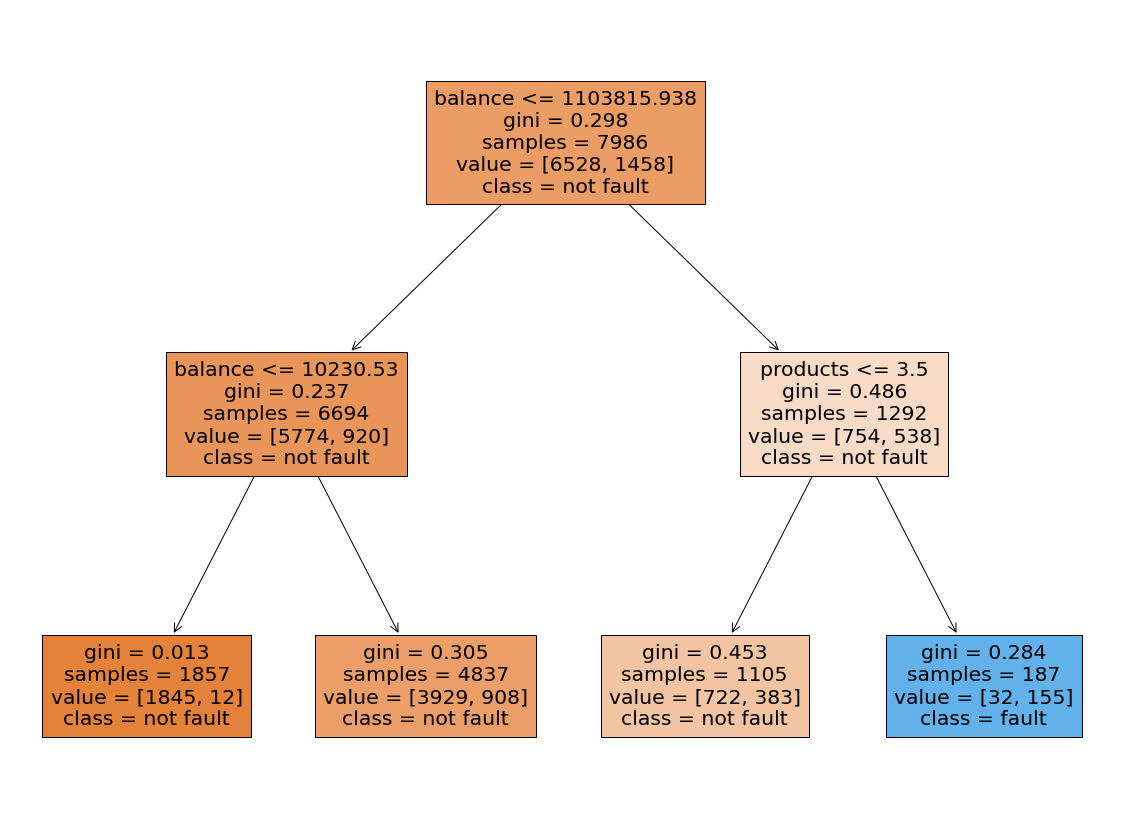

In [69]:
plt.figure(figsize = (20,15)) # задайте размер фигуры, чтобы получить крупное изображение
tree.plot_tree(tree_model, filled=True, feature_names = X_train.columns, class_names = ['not fault', 'fault'])
plt.show()